# Physics-based Deep Learning
## Inverse Function of a Parabola

Given the function $\mathcal P: y \to y^2$ for $y$ on the interval $[0,1]$, find the unknown function $f$ such that $\mathcal P (f(x)) = x$ for all $x$ in $[0,1]$.

### 1. Supervised Approach

In [1]:
# Imports

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# X-Data

N = 200
X = np.random.random(N)

# Generation Y-Data

sign = (- np.ones((N,)))**np.random.randint(2,size=N)
Y = np.sqrt(X) * sign

In [3]:
# Neural Network

act = tf.keras.layers.ReLU()
nn_sv = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation=act, input_shape=(1,)),
    tf.keras.layers.Dense(10, activation=act),
    tf.keras.layers.Dense(1,activation='linear')
])

# Loss Function

loss_sv = tf.keras.losses.MeanSquaredError()
optimizer_sv = tf.keras.optimizers.Adam(learning_rate=0.001)
nn_sv.compile(optimizer=optimizer_sv, loss=loss_sv)

In [4]:
# Training

results_sv = nn_sv.fit(X, Y, epochs=5, batch_size= 5, verbose=1)

Epoch 1/5
40/40 [==============================] - 0s 814us/step - loss: 0.4909
Epoch 2/5
40/40 [==============================] - 0s 884us/step - loss: 0.4816
Epoch 3/5
40/40 [==============================] - 0s 1ms/step - loss: 0.4788
Epoch 4/5
40/40 [==============================] - 0s 802us/step - loss: 0.4772
Epoch 5/5
40/40 [==============================] - 0s 1ms/step - loss: 0.4773


7/7 [==============================] - 0s 3ms/step


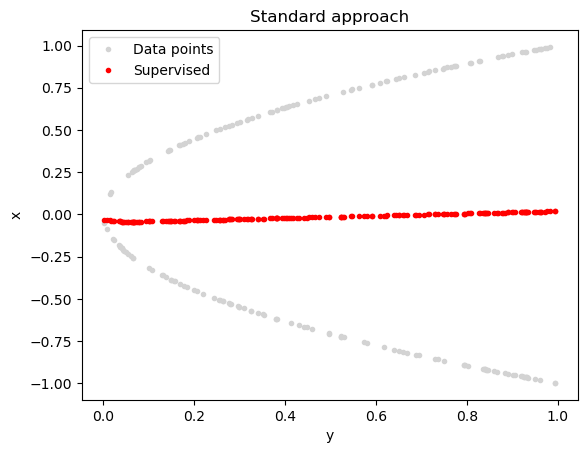

In [5]:
# Results

plt.plot(X,Y,'.',label='Data points', color="lightgray")
plt.plot(X,nn_sv.predict(X),'.',label='Supervised', color="red")
plt.xlabel('y')
plt.ylabel('x')
plt.title('Standard approach')
plt.legend()
plt.show()

### 2. Differentiable Physics Approach

In [6]:
# Neural Network

nn_dp = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation=act, input_shape=(1,)),
  tf.keras.layers.Dense(10, activation=act),
  tf.keras.layers.Dense(1, activation='linear')
])

# Loss Function

mse = tf.keras.losses.MeanSquaredError()
def loss_dp(y_true, y_pred):
    return mse(y_true, y_pred**2)

optimizer_dp = tf.keras.optimizers.Adam(learning_rate=0.001)
nn_dp.compile(optimizer=optimizer_dp, loss=loss_dp)

In [7]:
#Training

results_dp = nn_dp.fit(X, X, epochs=5, batch_size=5, verbose=1)

Epoch 1/5
40/40 [==============================] - 0s 1ms/step - loss: 0.2236
Epoch 2/5
40/40 [==============================] - 0s 801us/step - loss: 0.0083
Epoch 3/5
40/40 [==============================] - 0s 2ms/step - loss: 9.8823e-04
Epoch 4/5
40/40 [==============================] - 0s 1ms/step - loss: 8.7112e-04
Epoch 5/5
40/40 [==============================] - 0s 1ms/step - loss: 8.2427e-04


7/7 [==============================] - 0s 2ms/step


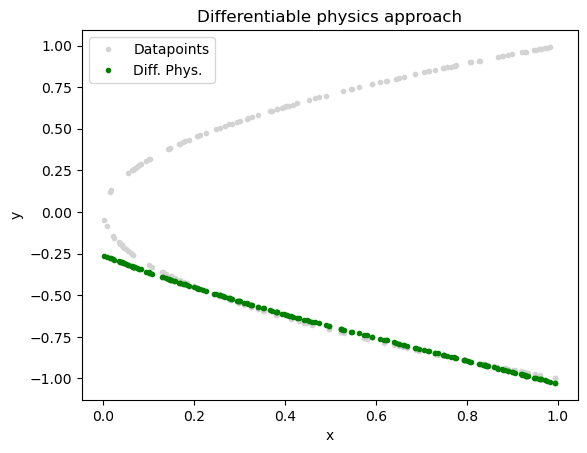

In [8]:
# Results

plt.plot(X,Y,'.',label='Datapoints', color="lightgray")
#plt.plot(X,nn_sv.predict(X),'.',label='Supervised', color="red") # optional for comparison
plt.plot(X,nn_dp.predict(X),'.',label='Diff. Phys.', color="green") 
plt.xlabel('x')
plt.ylabel('y')
plt.title('Differentiable physics approach')
plt.legend()
plt.show()